Things dataset from:
Link: martin-hebart.com/things_database/images.zip
user: researcher
PW: things4all

In [1]:
import torch
import torch.optim as optim
from torchvision import datasets,transforms
import torchvision
import torch.utils
from draw_model import DrawModel
from config import *
from utility import Variable,save_image,xrecons_grid
import torch.nn.utils
import matplotlib.pyplot as plt
import os
import torchvision.transforms as T
import numpy as np
import cv2
#from keras.preprocessing import image
from PIL import Image

ModuleNotFoundError: No module named 'cv2'

In [ ]:
from torchvision.datasets.folder import default_loader

In [222]:

class MySpecialDataset(datasets.ImageFolder):
    def __init__(self, root, loader=default_loader, is_valid_file=None, transform=None):
        super(MySpecialDataset, self).__init__(root=root, loader=loader, is_valid_file=is_valid_file, transform=transform)

    def __getitem__(self, index):
        image_path, target = self.samples[index]
        # do your magic here
        im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        high_thresh, thresh_im = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        lowThresh = 0.5*high_thresh
        edges = cv2.Canny(im,lowThresh,high_thresh)
        sample = cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)
        # this has to be done CAREFULLY!
        sample = Image.fromarray(sample)
#        sample = torchvision.transforms.ToTensor()(backtorgb)
        if self.transform is not None:
            sample = self.transform(sample)
        return sample, target


In [223]:
const = MySpecialDataset(os.path.join("imagesThings"), transform=transforms.Compose([transforms.Resize((100,100)), transforms.ToTensor()]))

In [224]:
train_loader = torch.utils.data.DataLoader(const,
    batch_size=batch_size, shuffle=False)

In [225]:
iterator = iter(train_loader)

Feature batch shape: torch.Size([64, 3, 100, 100])
Labels batch shape: torch.Size([64])


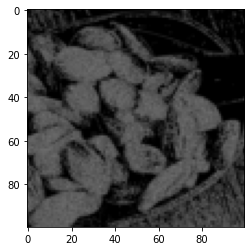

Label: 13


In [229]:
train_features, train_labels = next(iterator)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = np.transpose(np.asarray(train_features[0]), (1,2,0))
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {train_labels[0]}")

In [89]:
"""
#const = datasets.ImageFolder("imagesThings", transform=transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor()]))

import pickle
class MySpecialCIFAR(datasets.CIFAR10):
    def __init__(self, root, train = True, transform = None, target_transform = None, download = False):
        super(datasets.CIFAR10, self).__init__(root, transform = transform, target_transform = target_transform)
        
        self.train = train  # training set or test set

        if download:
            self.download()

        if not self._check_integrity():
            raise RuntimeError('Dataset not found or corrupted.' +
                               ' You can use download=True to download it')

        if self.train:
            downloaded_list = self.train_list
        else:
            downloaded_list = self.test_list

        self.data: Any = []
        self.targets = []

        # now load the picked numpy arrays
        for file_name, checksum in downloaded_list:
            file_path = os.path.join(self.root, self.base_folder, file_name)
            with open(file_path, 'rb') as f:
                entry = pickle.load(f, encoding='latin1')
                self.data.append(entry['data'])
                if 'labels' in entry:
                    self.targets.extend(entry['labels'])
                else:
                    self.targets.extend(entry['fine_labels'])

        self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        self.data = self.data.transpose((0, 2, 3, 1))  # convert to HWC

        self._load_meta()

        
    def __getitem__(self, index: int):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        img, target = self.data[index], self.targets[index]
        print(type(img))
        print(img.shape)
        edges = cv2.Canny(img,100,255)
        backtorgb = cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)
        
        
        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        img = Image.fromarray(backtorgb)

        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target
        
"""